In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
mushroom_data = pd.read_csv("1.csv")
X_mush, y_mush = mushroom_data.drop(columns=["class"]), mushroom_data["class"]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_mush,y_mush,test_size=0.2,random_state=1234)

In [4]:
def normal_prob(mean, sd, feature):
    return 1/(np.sqrt(2*np.pi)*sd)*np.exp(-np.square(feature-mean)/(2*sd**2))


In [5]:
class NB:
    def __init__(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_class(self, x):
        num = None
        max_num = 0
        for y in set(self.y_train):
            p_y = self.y_train.value_counts()[y]/len(self.y_train)
            p_xy = 1
            for col in self.X_train.columns:
                if col in self.X_train._get_numeric_data().columns:
                    p_xy = p_xy * normal_prob(self.X_train[col][self.y_train == y].mean(
                        ), np.sqrt(self.X_train[col][self.y_train == y].var()), x[col])
                else:
                    p_xy = p_xy * len(self.X_train[self.X_train[col] == x[col]][self.y_train == y]) / len(
                        self.X_train[self.y_train == y])
            if p_y * p_xy > max_num:
                max_num = p_y * p_xy
                num = y
        return num

    def predict(self, test):
        return test.apply(self.predict_class, axis=1)


In [6]:
clf = NB(X_train,y_train)
predictions = clf.predict(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_17848\2485740554.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_xy = p_xy * len(self.X_train[self.X_train[col] == x[col]][self.y_train == y]) / len(


In [7]:
accuracy = np.sum(predictions == y_test) / len(y_test)
accuracy


0.9950769230769231

[[811   2]
 [  6 806]]


<AxesSubplot:>

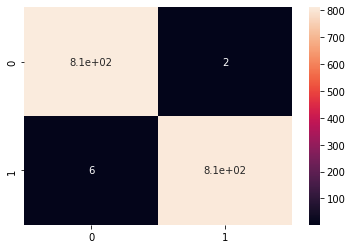

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
con_matrix = confusion_matrix(predictions,y_test)
print(con_matrix)
sns.heatmap(con_matrix,annot=True)